In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Concentracions in E.Coli
ORN = 0.010 #mM
ARG = 0.570 #mM
acCoA= 0.606 #mM 
CoA = 1.37 #mM
PUT = 5.6 #mM
SPD = 1.1 #mM
SPM = 0.0 #mM
SAM = 0.184 #mM
A = 0 #INVENTAT decarboxylated S-adenosylmethionine
aD = 0#INVENTAT
aS = 0#INVENTAT
Antz = 0#INVENTAT
SAT = 0#INVENTAT
PAO = 0 # WT -> No PAO
SpdS = 0 # INVENTAT
SpmS = 0 # INVENTAT
MAT = 0 # INVENTAT
Met = 1 # INVENTAT

In [4]:
   # Ks, v_maxs(turnovers)
    
#ODC
K_ODC_cat  = 1 # 1/mM·s^-1
K_ODC_M = 3.3 # 1/mM
K_ODC_cat = 3.4 # 1/s
K_ODC_iP = 1 # INVENTAT
v_max_ODC = K_ODC_cat * ORN

K_ODC_s = 0 # Synthesis (inventat assumint enzim constant)
K_ODC_d = 0 # Degradació (inventat "  " " ")
K_ODC_eq = 0 # NPI
#SAMdc
K_SAMdc_cat = 0 # INVENTAT
K_SAMdc_iS = 1 # INVENTAT
K_SAMdc_M = 0.06
K_SAMdc_aP = 1 # INVENTAT
K_SAMdc_iA = 1 # INVENTAT

v_max_SAMdc = K_SAMdc_cat * SAM

K_SAMdc_s = 0 # Synthesis (inventat assumint enzim constant)
K_SAMdc_d = 0 # Degradació (inventat "  " " ")
K_SAMdc_eq = 0 # NPI


#SAT
K_SAT_MS = 0.076
K_SAT_MD = 0.323
K_SAT_MacCoA = 0.031
K_SAT_MCoA = 1 # INVENTAT
K_SAT_MaS = 0.295
K_SAT_D_cat = 0.087
K_SAT_S_cat = 0.32

v_max_SAT_S = K_SAT_S_cat * SAT
v_max_SAT_D = K_SAT_D_cat * SAT

K_SAT_s = 0 # Synthesis (inventat assumint enzim constant)
K_SAT_d = 0 # Degradació (inventat "  " " ")
K_SAT_eq = 0 # NPI

#PAO
K_PAO_cat = 0 
K_PAO_MaD = 1# INVENTAT 
K_PAO_MaS = 1# INVENTAT
K_PAO_MD = 1# INVENTAT
K_PAO_MS = 1# INVENTAT

v_max_PAO = K_PAO_cat * PAO

#SpdS

K_SpdS_cat_A = 0.138
K_SpdS_ia = 1 # INVENTAT
K_SpdS_P = 0.0778
K_SpdS_iD = 1 # INVENTAT
K_SpdS_A = 0.032
Ki_SpdS = 0.00005 #Inhibition from S-Adenosyl-1,8-diamino-3-thiooctane

v_max_SpdS = K_SpdS_cat_A * SpdS

#SpmS
K_SpmS_cat = 0 # INVENTAT
K_SpmS_ia = 1 # INVENTAT
K_SpmS_D = 1 # INVENTAT
K_SpmS_iS = 1 # INVENTAT
K_SpmS_A = 1 # INVENTAT

v_max_SpmS = K_SpmS_cat * SpmS

#MAT 
K_MAT_cat = 0
K_MAT_M = 1 # INVENTAT
K_MAT_iMet = 1 # INVENTAT

v_max_MAT = K_MAT_cat * MAT

#acCoA
K_acCoa = 0
K_CoA = 0

#Efflux
K_P_efflux = 0
K_aD_efflux = 0
v_Pefflux = 0

#Antz
K_Antz_s = 0 # Synthesis (inventat assumint enzim constant)
K_Antz_d = 0 # Degradació (inventat assumint enzim constant)
K_Antz_eq = 0 # NPI

In [6]:
#TO BE UPDATED AT EACH TIME-STEP
#Velocitats
dt = 0.01
tmax = 1e4
store = np.zeros([10,int(tmax/dt)])
store[:,0] = [PUT,SPD,SPM,SAM,A,aD,aS,acCoA,CoA,Antz]
for t in range (0,int(tmax/dt)):
    v_ODC = v_max_ODC*ORN/(K_ODC_M*(1+PUT/K_ODC_iP)+ORN) 
    v_SAMdc = (v_max_SAMdc/(1+SPM/K_SAMdc_iS))*SAM/(K_SAMdc_M*(1+K_SAMdc_aP/PUT+A/K_SAMdc_iA)+SAM)
    v_SAT_D = (v_max_SAT_D*SPD*acCoA) /(K_SAT_MD*(1+SPM/K_SAT_MS)*K_SAT_MacCoA*(1+CoA/K_SAT_MCoA)+K_SAT_MacCoA*(1+CoA/K_SAT_MCoA)*SPD+K_SAT_MD*(1+SPM/K_SAT_MS)*acCoA+SPD*acCoA)
    v_SAT_S = (v_max_SAT_S*SPM*acCoA) /(K_SAT_MS*(1+SPD/K_SAT_MD)*K_SAT_MacCoA*(1+CoA/K_SAT_MCoA)+K_SAT_MacCoA*(1+CoA/K_SAT_MCoA)*SPM+K_SAT_MD*(1+SPD/K_SAT_MS)*acCoA+SPM*acCoA)
    v_PAO_aD = v_max_PAO*aD/(K_PAO_MaD*(1+aD/K_PAO_MaD+aS/K_PAO_MaS+SPD/K_PAO_MD+SPM/K_PAO_MS))
    v_PAO_aS = v_max_PAO*aS/(K_PAO_MaS*(1+aD/K_PAO_MaD+aS/K_PAO_MaS+SPD/K_PAO_MD+SPM/K_PAO_MS))
    v_SpdS = v_max_SpdS*A*PUT/(K_SpdS_ia*K_SpdS_P*(1+SPD/K_SpdS_iD)+K_SpdS_P*A+K_SpdS_A*(1+SPD/K_SpdS_iD)*PUT+A*PUT)
    v_SpmS = v_max_SpmS*A*SPD/(K_SpmS_ia*K_SpmS_D*(1+SPM/K_SpmS_iS)+K_SpmS_D*A+K_SpmS_A*(1+SPM/K_SpmS_iS)*SPD+A*SPD)
    v_MAT = v_max_MAT / (1+ (K_MAT_M/Met)*(1+SAM/K_MAT_iMet))
    v_acCoA = K_acCoa * CoA
    v_CoA = K_CoA * acCoA
    v_P_efflux = K_P_efflux * PUT
    v_aD_efflux = K_aD_efflux * aD

    # Time-dependent variables
    
    dPUTdt = v_ODC + v_PAO_aS - v_SpdS - v_Pefflux 
    dSPDdt = v_SpdS + v_PAO_aS - v_SpmS - v_SAT_D
    dSPMdt = v_SpmS - v_SAT_S
    dSAMdt = v_MAT - v_SAMdc
    dAdt = v_SAMdc - v_SpdS - v_SpmS
    daDdt = v_SAT_D - v_PAO_aD - v_aD_efflux
    daSdt = v_SAT_S - v_PAO_aS
    dacCoAdt = v_acCoA - v_CoA - v_SAT_S - v_SAT_D
    dCoAdt = v_CoA + v_SAT_S + v_SAT_S - v_acCoA
    dv_max_ODCdt = K_ODC_s*(1/(1+(K_ODC_eq*(SPD+SPM))))-K_ODC_d*Antz*v_max_ODC
    dAntzdt = K_Antz_s*(1-1/(1+K_Antz_eq*(SPD+SPM)))-K_Antz_d*Antz
    dv_max_SAMdcdt = K_SAMdc_s*(1/(1+K_SAMdc_eq*(SPD+SPM)))-K_SAMdc_d*v_max_SAMdc
    dv_max_SAT_Ddt = K_SAT_s*(1-1/(1+(K_SAT_eq*(SPD+SPM))))-K_SAT_d*(1/(1+K_SAT_eq*(SPD+SPM)))*v_max_SAT_D #REVISAR PQ MODIFICADA AL LIBRE ALBEDRÍO
    dv_max_SAT_Sdt = K_SAT_s*(1-1/(1+(K_SAT_eq*(SPD+SPM))))-K_SAT_d*(1/(1+K_SAT_eq*(SPD+SPM)))*v_max_SAT_S #REVISAR PQ MODIFICADA AL LIBRE ALBEDRÍO


    PUT = PUT + dPUTdt * dt 
    SPD = SPD + dSPDdt * dt
    SPM = SPM + dSPMdt * dt
    SAM = SAM + dSAMdt * dt
    A   =  A  + dAdt   * dt
    aD  =  aD + daDdt  * dt
    aS  =  aS + daSdt  * dt
    acCoA = acCoA + dacCoAdt * dt
    CoA = CoA + dCoAdt
    v_max_ODC = v_max_ODC + dv_max_ODCdt * dt
    Antz = Antz + dAntzdt * dt
    v_max_SAMdc = v_max_SAMdc + dv_max_SAMdcdt * dt
    v_max_SAT_D = v_max_SAT_D + dv_max_SAT_Ddt * dt
    v_max_SAT_S = v_max_SAT_S + dv_max_SAT_Sdt * dt
    store[:,t] = [PUT,SPD,SPM,SAM,A,aD,aS,acCoA,CoA,Antz]

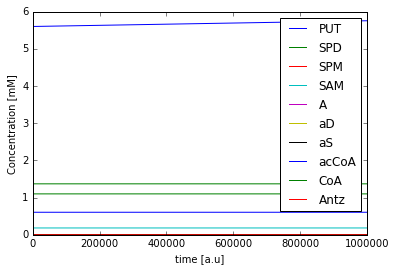

In [9]:
plt.plot(store.T)
plt.legend(['PUT','SPD','SPM','SAM','A','aD','aS','acCoA','CoA','Antz'])
plt.xlabel('time [a.u]')
plt.ylabel('Concentration [mM]')

In [6]:
0.606e-3

0.000606